# Import Lib

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import AveragePooling2D, Dropout, Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import LearningRateScheduler

In [13]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os
import math

# Operation Of Data

In [14]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

DIR = r"C:\Users\smart\Desktop\AI\Projects\Custom_Sentiment_Analysis"
CAT = ["with_mask", "without_mask"]

print("[INFO] loading image ....")

data = []
labels = []

for category in CAT:
    path = os.path.join(DIR , category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)
        
        data.append(image)
        labels.append(category)

[INFO] loading image ....


C:\Users\smart\anaconda3\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


# Encoding Label

In [15]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data, dtype="float32")
labels = np.array(labels)

(x_train, x_test, y_train, y_test) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

In [22]:
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

# Data Augmentation

In [17]:
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Load MobeleNet_V2

In [18]:
baseModel = MobileNetV2(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224,224,3)))

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

# Loop Over All Layers

In [16]:
for layer in baseModel.layers:
    layer.trainable = False
    
print("[INFO] compiling model....")
# Define a learning rate schedule function
def lr_schedule(epoch):
    initial_lr = INIT_LR
    drop = 0.5
    epochs_drop = 10.0
    lr = initial_lr * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lr

# Update the optimizer initialization to remove the decay parameter
opt = Adam(lr=INIT_LR)

# Compile the model with the optimizer and metrics
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

# Define a learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model with the learning rate scheduler callback
H = model.fit(
    aug.flow(x_train, y_train, batch_size=BS),
    steps_per_epoch=len(x_train) // BS,
    validation_data=(x_test, y_test),
    validation_steps=len(x_test) // BS,
    epochs=EPOCHS,
    callbacks=[lr_scheduler]
)

[INFO] compiling model....
Epoch 1/20



89/89 [==============================] - 98s 1s/step - loss: 0.4553 - accuracy: 0.8190 - val_loss: 0.1707 - val_accuracy: 0.9777 - lr: 1.0000e-04
Epoch 2/20
89/89 [==============================] - 76s 858ms/step - loss: 0.1672 - accuracy: 0.9587 - val_loss: 0.0853 - val_accuracy: 0.9805 - lr: 1.0000e-04
Epoch 3/20
89/89 [==============================] - 78s 879ms/step - loss: 0.1049 - accuracy: 0.9721 - val_loss: 0.0617 - val_accuracy: 0.9833 - lr: 1.0000e-04
Epoch 4/20
89/89 [==============================] - 86s 964ms/step - loss: 0.0844 - accuracy: 0.9757 - val_loss: 0.0509 - val_accuracy: 0.9847 - lr: 1.0000e-04
Epoch 5/20
89/89 [==============================] - 79s 889ms/step - loss: 0.0683 - accuracy: 0.9824 - val_loss: 0.0478 - val_accuracy: 0.9847 - lr: 1.0000e-04
Epoch 6/20
89/89 [==============================] - 78s 879ms/step - loss: 0.0538 - accuracy: 0.9873 - val_loss: 0.0383 - val_accuracy: 0.9874 - lr: 1.0000e-04
Epoch 7/20
89/89 [==============================] - 76

In [17]:
for l in model.layers:
    print(l.name, l.trainable)

input_2 False
Conv1 False
bn_Conv1 False
Conv1_relu False
expanded_conv_depthwise False
expanded_conv_depthwise_BN False
expanded_conv_depthwise_relu False
expanded_conv_project False
expanded_conv_project_BN False
block_1_expand False
block_1_expand_BN False
block_1_expand_relu False
block_1_pad False
block_1_depthwise False
block_1_depthwise_BN False
block_1_depthwise_relu False
block_1_project False
block_1_project_BN False
block_2_expand False
block_2_expand_BN False
block_2_expand_relu False
block_2_depthwise False
block_2_depthwise_BN False
block_2_depthwise_relu False
block_2_project False
block_2_project_BN False
block_2_add False
block_3_expand False
block_3_expand_BN False
block_3_expand_relu False
block_3_pad False
block_3_depthwise False
block_3_depthwise_BN False
block_3_depthwise_relu False
block_3_project False
block_3_project_BN False
block_4_expand False
block_4_expand_BN False
block_4_expand_relu False
block_4_depthwise False
block_4_depthwise_BN False
block_4_depthwi

In [18]:
print("[INFO] evaluating network....")
predIdxs = model.predict(x_test, batch_size= BS)

predIdxs = np.argmax(predIdxs, axis= 1)

[INFO] evaluating network....
23/23 [==============================] - 12s 480ms/step


# Save Model

In [32]:
print("[INFO] saving model....")
model.save("mask_detector.model.h5", save_format= "h5")

[INFO] saving model....


# Digrams of loss and accuarcy

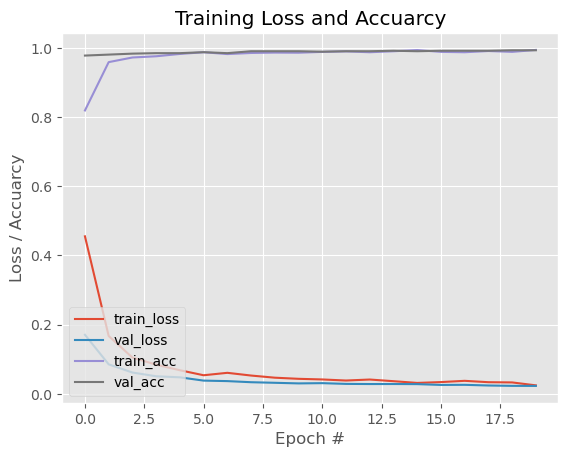

In [27]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuarcy")
plt.xlabel("Epoch #")
plt.ylabel("Loss / Accuarcy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

# Mask Detection on real time

In [19]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

In [20]:
# Define the input shape of your model
height = 224  # Example height, replace with actual height of your input images
width = 224   # Example width, replace with actual width of your input images
input_shape = (height, width)
color = (255, 255, 255) 
radius = 100

In [25]:
# Function to preprocess input frame
def preprocess_frame(frame):
    # Preprocess the frame (resize, normalize, etc.)
    # Make sure the preprocessing steps match those used during model training
    resized_frame = cv2.resize(frame, input_shape)  # Resize frame to match input shape of the model
    preprocessed_frame = resized_frame / 255.0  # Normalize pixel values to [0, 1]
    return preprocessed_frame

# Load your trained model
model = load_model('mask_detector.model.h5')  # Load your trained model

# Function to detect mask in real-time
def detect_mask_real_time():
    # Start capturing video
    cap = cv2.VideoCapture(0)  # Use 0 for default webcam
    while True:
        ret, frame = cap.read()  # Read a frame from the video source
        if not ret:
            print("Failed to capture frame.")
            break

        # Preprocess the frame
        preprocessed_frame = preprocess_frame(frame)

        # Perform inference
        prediction = model.predict(np.expand_dims(preprocessed_frame, axis=0)) 

        predicted_class = np.argmax(prediction)
        label = "Mask" if predicted_class == 1 else "No Mask"

        # Display the result on the frame
        center = (150, 40)  
        axes = (80, 25)  
        angle = 0  
        start_angle = 0  
        end_angle = 360  
        cv2.ellipse(frame, center, axes, angle, start_angle, end_angle, (119,0,179), -1) 
         # Put text in the center of the ellipse
        text = label
        text_size = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)[0]
        text_x = center[0] - text_size[0] // 2
        text_y = center[1] + text_size[1] // 2
        cv2.putText(frame, text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
        #cv2.rectangle(frame, (50, 20), (250, 60), (0, 255, 255 / 0.5), -1, radius)
        #cv2.putText(frame, label, (height - 140, width - 170), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

        # Display the frame
        cv2.imshow('Mask Detection', frame)

        # Check for user input to exit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release video capture and close OpenCV windows
    cap.release()
    cv2.destroyAllWindows()

# Run mask detection in real-time
detect_mask_real_time()

1/1 [==============================] - 0s 49ms/step


In [27]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import MobileNetV2

# Load the pre-trained face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the pre-trained mask detection model
model = load_model("mask_detector.model.h5")

# Start capturing video from the webcam
cap = cv2.VideoCapture(0)

while True:
    # Read a frame from the video stream
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture frame.")
        break
    
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the grayscale frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    for (x, y, w, h) in faces:
        # Extract the face ROI
        face_roi = frame[y:y+h, x:x+w]
        
        # Preprocess the face ROI for mask detection
        face_input = cv2.resize(face_roi, (224, 224))
        face_input = img_to_array(face_input)
        face_input = preprocess_input(face_input)
        face_input = np.expand_dims(face_input, axis=0)
        
        # Predict whether the face is wearing a mask
        mask, without_mask = model.predict(face_input)[0]
        
        # Determine the label and color for the bounding box
        label = "Mask" if mask > without_mask else "No Mask"
        color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
        
        # Display the label and bounding box on the frame
        cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
    
    # Display the frame with mask detection
    cv2.imshow('Mask Detection', frame)
    
    # Check for user input to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close OpenCV windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 51ms/step
